In [1]:
import random
import pandas as pd
import numpy as np
random.seed(7)
input_data = pd.DataFrame([["P"] * 10 + ["N"] * 10, [round(random.random(), 2) for _ in range(20)]],
                          index=["Actual Label", "Prediction Probability"]).T

In [2]:
threshold = 0
data_points = []
metrics = []
while threshold <= 1:
    # Assign Predicted Label based on probability and threshold
    threshold_mask = input_data["Prediction Probability"]>threshold
    input_data[f"Threshold = {round(threshold, 1)}"] = np.where(threshold_mask, "P", "N")
    # Calculate counts
    n_true_positive = (input_data["Actual Label"].eq("P") & threshold_mask).sum()
    n_true_negative = (input_data["Actual Label"].eq("N") & ~threshold_mask).sum()
    n_false_negative = (input_data["Actual Label"].eq("P") & ~threshold_mask).sum()
    n_false_positive = (input_data["Actual Label"].eq("N") & threshold_mask).sum()
    tpr = n_true_positive / (n_true_positive + n_false_negative)
    fpr = 1-n_true_negative / (n_true_negative + n_false_positive)
    data_points.append([tpr, fpr])
    
    metrics.append([round(value, 2) for value in [threshold, n_true_positive, n_false_positive, n_true_negative, n_false_negative, tpr, fpr]])
    # Increment threshold by 0.1 at each iteration
    threshold += 0.1

metrics = pd.DataFrame(metrics, columns=["Threshold", "TP", "FP", "TN", "FN", "TPR", "FPR"])

input_data.to_excel("data.xlsx")
input_data

,Actual Label,Prediction Probability,Threshold = 0,Threshold = 0.1,Threshold = 0.2,Threshold = 0.3,Threshold = 0.4,Threshold = 0.5,Threshold = 0.6,Threshold = 0.7,Threshold = 0.8,Threshold = 0.9,Threshold = 1.0
0,P,0.32,P,P,P,P,N,N,N,N,N,N,N
1,P,0.15,P,P,N,N,N,N,N,N,N,N,N
2,P,0.65,P,P,P,P,P,P,P,N,N,N,N
3,P,0.07,P,N,N,N,N,N,N,N,N,N,N
4,P,0.54,P,P,P,P,P,P,N,N,N,N,N
5,P,0.37,P,P,P,P,N,N,N,N,N,N,N
6,P,0.06,P,N,N,N,N,N,N,N,N,N,N
7,P,0.51,P,P,P,P,P,P,N,N,N,N,N
8,P,0.04,P,N,N,N,N,N,N,N,N,N,N
9,P,0.43,P,P,P,P,P,N,N,N,N,N,N


In [3]:
metrics.to_excel("metrics.xlsx")
metrics

,Threshold,TP,FP,TN,FN,TPR,FPR
0,0.0,10,10,0,0,1.0,1.0
1,0.1,7,8,2,3,0.7,0.8
2,0.2,6,7,3,4,0.6,0.7
3,0.3,6,6,4,4,0.6,0.6
4,0.4,4,5,5,6,0.4,0.5
5,0.5,3,4,6,7,0.3,0.4
6,0.6,1,3,7,9,0.1,0.3
7,0.7,0,2,8,10,0.0,0.2
8,0.8,0,2,8,10,0.0,0.2
9,0.9,0,1,9,10,0.0,0.1


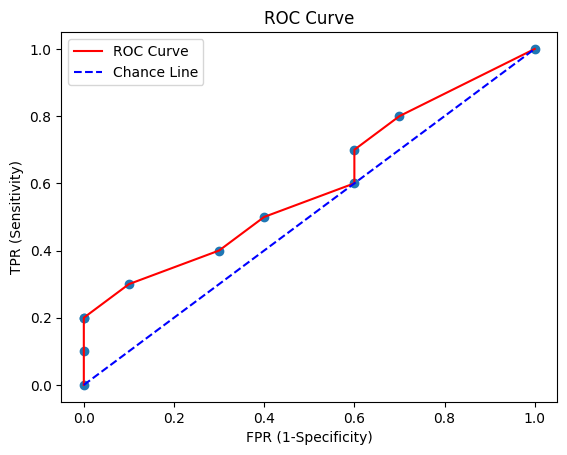

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x_pos = []
y_pos = []
for x,y in data_points:
    x_pos.append(x)
    y_pos.append(y)
ax.scatter(x_pos, y_pos)
ax.plot(x_pos, y_pos, color='red', label="ROC Curve")
ax.plot([0, 1], [0, 1], color="b", linestyle="--", label="Chance Line")
ax.set_xlabel("FPR (1-Specificity)")
ax.set_ylabel("TPR (Sensitivity)")
ax.set_title("ROC Curve")
ax.legend()